In [2]:
import numpy as np
import math
from datetime import datetime

## Question 1

### a) What time (clock) did the sun set that day? [h]

In [3]:
month = 10
day = 15
hour = 17
minute = 6
time_zone = 2
tz_meridian = -15*time_zone
latitude = -(34 +21/60 + 24/3600)
longitude = -(18 + 29/60 + 51/3600)

In [4]:
date = datetime(2025,month,day)
day_of_year = int(date.strftime("%j"))
print("The day of the year is: ",day_of_year)

The day of the year is:  288


In [5]:
n = day_of_year

#Declination angle
delta = np.arcsin(0.39795*np.cos(2*np.pi*(n-173)/365))
print("Declination angle = ", round(np.rad2deg(delta), 4))

Declination angle =  -9.1026


In [6]:
phi = np.deg2rad(latitude)

#Zenith angle at sunset
theta_0 = np.deg2rad(90)

cos_omega_0 = (np.cos(theta_0)-np.sin(phi)*np.sin(delta))/(np.cos(phi)*np.cos(delta))

omega_0 = np.arccos(cos_omega_0)

t_s0 = omega_0*12/np.pi+12

print("Hour angle at sunset is ", round(omega_0,4))
print("Solar time at sunset is ", round(t_s0,4))


Hour angle at sunset is  1.6805
Solar time at sunset is  18.4192


In [7]:
# Convert to hours and minutes
hours = int(t_s0)
minutes = int((t_s0 - hours) * 60)

print(f"Solar clock at sunset is {hours}:{minutes}")

Solar clock at sunset is 18:25


In [8]:
A = 0.258
B = -7.416
C = -3.648
D = -9.228
n = day_of_year


t_EOT = A*np.cos(2*np.pi*(n-1)/365) + B*np.sin(2*np.pi*(n-1)/365) + C*np.cos(4*np.pi*(n-1)/365) + D*np.sin(4*np.pi*(n-1)/365)

print(round(t_EOT,4))

14.6223


In [9]:
t_DST = 0

t_clk = t_s0 - ((tz_meridian-longitude)/15 + t_EOT/60 + t_DST)

print("Local solar clock at sunset is ", round(t_clk,4))
print((tz_meridian-longitude)/15)

Local solar clock at sunset is  18.9423
-0.7668333333333331


In [10]:
# Convert to hours and minutes
hours_clk = int(t_clk)
minutes_clk = int((t_clk - hours_clk) * 60)

print(f"Local solar clock at sunset is {hours_clk}:{minutes_clk}")

Local solar clock at sunset is 18:56


### b) Which was the optimum surface azimuth angle to minimize the surface cosine effectiveness at that time (defined just after the figure) if the surface tilt angle is greater than 0 degrees? [°] (provide a value -180°<γc<180°)

In [11]:
clock_time = hour + minute/60

print("Clock time is ",clock_time)

Clock time is  17.1


In [12]:
t_s = clock_time + (tz_meridian-longitude)/15 + t_EOT/60 + t_DST

print(f"Solar time at {hour}:{minute} (h) = {round(t_s,4)}")

Solar time at 17:6 (h) = 16.5769


In [13]:
#Hour angle
omega = np.pi*(t_s-12)/12
print(f"Hour angle at {hour}:{minute} (rad) = ", round(omega,4))

Hour angle at 17:6 (rad) =  1.1982


In [14]:

#Zenith angle
theta_z = np.arccos(np.cos(phi)*np.cos(delta)*np.cos(omega)+np.sin(phi)*np.sin(delta))
print("Zenith angle (rad) = " , round(theta_z,4))

#Azimuth angle
gamma_s = np.sign(omega)*np.abs(np.arccos((np.cos(theta_z)*np.sin(phi)-np.sin(delta))/(np.cos(phi)*np.sin(theta_z))))
print("Azimuth angle (rad) = ", round(gamma_s,4))

#Elevation angle
theta_s = 90-np.rad2deg(theta_z)
print("Elevation angle (º) = ", round(theta_s,4))  
  

Zenith angle (rad) =  1.1745
Azimuth angle (rad) =  1.6492
Elevation angle (º) =  22.7061


In [15]:
#Slope angle
beta_c = np.deg2rad(10)

from scipy.optimize import minimize_scalar

# def incidence(x):
#     return np.cos(beta_c)*np.cos(theta_z) + np.sin(beta_c)*np.sin(theta_z)*np.cos(gamma_s-x)

def cosine(x):
    return np.cos(gamma_s-x)

# Minimize the function
result = minimize_scalar(cosine)
print(f"Minimum value: {round(result.fun,4)}")
print(f"At surface azimuth angle = {round(np.rad2deg(result.x),4)}º")
print(f"Success: {result.success}")

gamma_c = result.x

Minimum value: -1.0
At surface azimuth angle = -85.5087º
Success: True


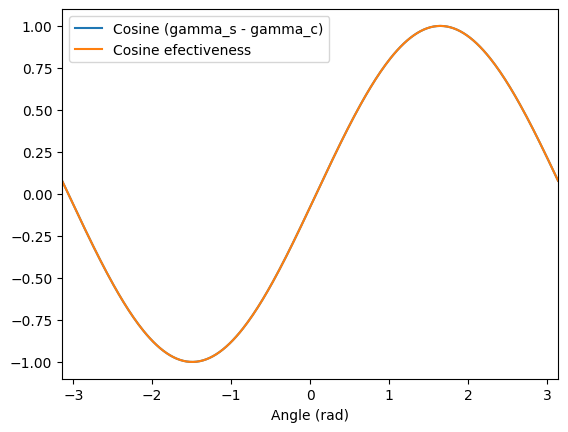

In [16]:
import matplotlib
import matplotlib.pyplot as plt

x = np.linspace(-np.pi, np.pi, num=300)

# Plot sin(x) and cos(x), and add label for each
plt.plot(x, np.cos(gamma_s-x), label="Cosine (gamma_s - gamma_c)")
plt.plot(x, cosine(x), label="Cosine efectiveness")

# Label the x-axis
plt.xlabel('Angle (rad)')

# Add legend
plt.legend()

# Use the start and end values in x as x limits
plt.xlim(x[0], x[-1])

plt.show()

### c) How much was the cosine effectiveness if the surface found is tilted 10 degrees (surface tilt angle) for the calculated surface azimuth angle? [%]

In [17]:
#Cosine effectiveness

beta_c = np.deg2rad(10)

theta = np.arccos(np.cos(beta_c)*np.cos(theta_z) + np.sin(beta_c)*np.sin(theta_z)*np.cos(gamma_s-gamma_c))

eta = np.cos(theta)

print("The incidence angle is", round(np.rad2deg(theta), 4), "º")
print("The cosine effectiveness is", round(eta*100, 4), "%")

The incidence angle is 77.2939 º
The cosine effectiveness is 21.995 %


### d) How much was the incident radiation on the bodies if the beam radiation was 700W/m2 and the diffuse radiation 250W/m2? [W/m2]

In [18]:
I_b = 700
I_d = 250

I_bc = I_b*np.cos(theta)

I_global = I_bc+I_d

print(f"Beam incident irradiation = {round(I_bc, 4)} W/m2")
print(f"Global incident irradiation = {round(I_global,4)} W/m2")

Beam incident irradiation = 153.965 W/m2
Global incident irradiation = 403.965 W/m2


## Question 2

A thermosyphon with a flat plate collector is operated to heat up the M building at KTH. After reaching steady state conditions, it works with the following properties:
 

$\tau^*_G$= 0.9 (Glass transmissivity)

$\alpha^*_A$= 0.95 (Absorber absortivity)

$\dot{m}$= 0.1 kg/s (Mass flow)

$F^{'}$= 0.95 (Correction efficiency factor)

$(UA)T$= 160 W/K (Total losses heat transfer coefficient)

$T_{amb}$= 15°C (Ambient temperature)

$A$ = 50m2 (Collector area)

$T_{water,inlet}$= 25°C (Inlet water temperature)

$I_{beam}$= 573.4  W/m2 (Beam radiation)

$I_{diffuse}$= 100 W/m2 (Diffuse radiation)

$\theta$ = 30° (Surface incident angle)

$c_P$= 4.18 kJ/kgK (Specific heat capacity of water)

 

 Assume the thermal losses of the collector are proportional to the difference between the ambient temperature and the mean fluid temperature.

### a) What is the expected collector efficiency of the thermosyphon? [%]

In [28]:
#Variables

F = 0.95
A = 50 # m2
t_g = 0.9
a_g = 0.95
UA = 160 #W/K
T_amb = 15 + 273.15 #K
m_dot = 0.1 #kg/s
c_p = 4.18*1000 #J/kgK
T_in = 25 + 273.15 #K
I_b = 573.4 #W/m2
I_d = 100 #W/m2
theta = np.deg2rad(30)

print(f"Ambient temperature = {round(T_amb,4)} K")
print(f"Inlet temperature = {round(T_in,4)} K")
print(f"Specific heat of water = {round(c_p,4)} J/kgK")


Ambient temperature = 288.15 K
Inlet temperature = 298.15 K
Specific heat of water = 4180.0 J/kgK


In [23]:
#Global irradiance

I_g = I_b*np.cos(theta)+I_d
print(f"Global irradiance = {round(I_g,4)} W/m2")

Global irradiance = 596.579 W/m2


In [31]:
#Outlet temperature. Formula in paper

T_out = (2*F*(I_g*A*t_g*a_g + UA*T_amb) - T_in*(F*UA - 2*m_dot*c_p))/(2*m_dot*c_p + F*UA)

print(f"Outlet temperature = {round(T_out,4)} K")
print(f"Outlet temperature = {round(T_out-273.15,4)} ºC")

Outlet temperature = 344.1188 K
Outlet temperature = 70.9688 ºC


In [32]:
#Mean fluid temperature

T_flm = (T_out + T_in)/2
print(f"Mean fluid temperature = {round(T_flm,4)} K")

Mean fluid temperature = 321.1344 K


In [33]:
#Efficiency

eta = F*(t_g*a_g - (UA*(T_flm - T_amb))/(A*I_g))

print(f"Efficiency = {round(eta*100,4)} %")

Efficiency = 64.4171 %


In [36]:
Q_use = m_dot*c_p*(T_out-T_in)

print(f"Heat used = {round(Q_use/1000,4)} kW")

Heat used = 19.2149 kW


### b) How much is the total heat (power) supplied by the collector to the building? [kW]

## Question 3 

A crystalline silicon PV module has 31 cells connected in series. Each cell is square with sides 150 mm, and rated at 15% maximum efficiency. 

Estimate the Pmpp at cell level (a.) and the open-circuit voltage (b.) of the module at STC if Isc = 300 A/m2 (at STC), and the cells have a rectangular V-I curve.

In [1]:
n_cells = 31
eta_mpp = 0.15
A_cell = (150/1000)**2 #m2
G_STC = 1000 #W/m2

P_mpp = eta_mpp*A_cell*G_STC

print(f"Maximum power point Power = {round(P_mpp,4)} W")

Maximum power point Power = 3.375 W


In [4]:
I_SC = 300*A_cell #A

V_oc = n_cells*P_mpp/I_SC

print(f"Open circuit voltage = {round(V_oc,4)} V")

Open circuit voltage = 15.5 V
